# R* and MRA* comparison*

## Настройка окружения

In [28]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d

plt.rcParams['figure.figsize'] = [15, 5]
EPS = 0.000001

In [29]:
import sys
import os

search_tools_path = os.path.join(os.getcwd(), 'search_tools')
if search_tools_path not in sys.path:
    sys.path.append(search_tools_path)

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from moving_ai.mai_map_reader import MaiReader, MaiMaps
from pipeline import Pipeline
from moving_ai.mai_map_visualizer import VisualizeMaiMap, VisualizeMaiMapGif

from algorithms.astar_heuristics import diagonal_dist
from algorithms.mrastar import MRAstar
from algorithms.wastar import WAstar
from algorithms.astar import Astar
from algorithms.rstar import Rstar

In [32]:
from processors.plot_expanded_and_actual_length_ratio import PlotExpandedAndActualLengthRatio
from processors.plot_success_rate import PlotSuccessRate
from processors.plot_mean_expanded import PlotMeanExpanded

## Сравнение алгоритмов на разных картах

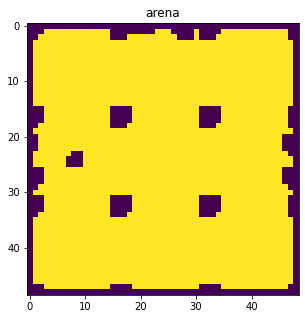

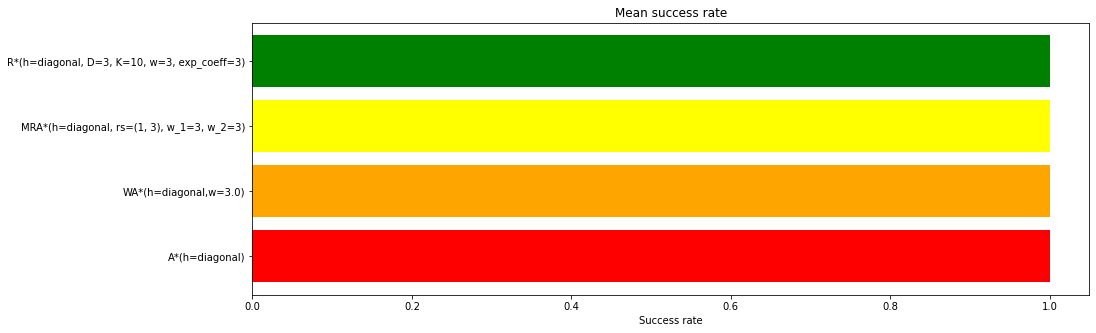

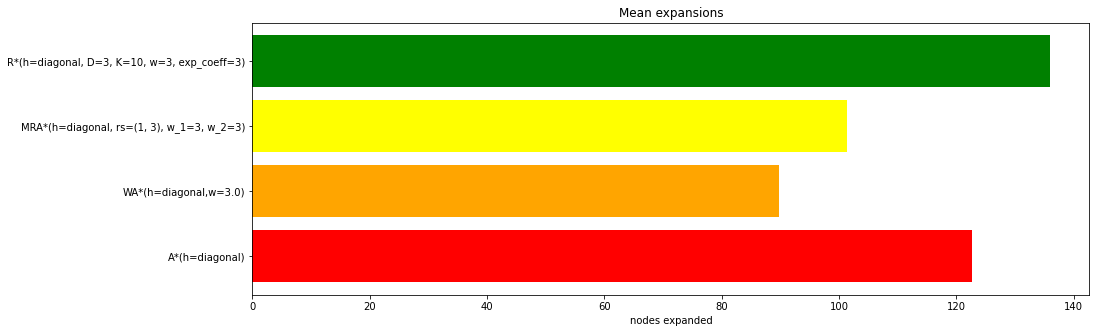

In [33]:
map = MaiMaps.ARENA
algorithms = [
    Astar(diagonal_dist),
    WAstar(diagonal_dist, 3),
    MRAstar(diagonal_dist, resolutions=(1, 3), w_1=3, w_2=3),
    Rstar(diagonal_dist, D=3, K=10, w=3, exp_coeff=3)
]
MaiReader(map).read_map().draw(map)

p = Pipeline(
    reader=MaiReader(map),
    algorithms=algorithms,
    processor=PlotSuccessRate().then(PlotMeanExpanded()),
    timelimit=3
)

p.run()

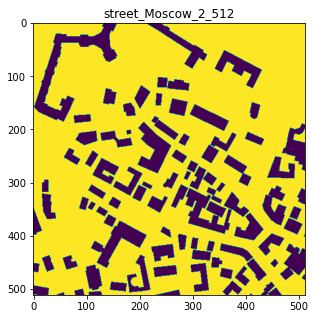

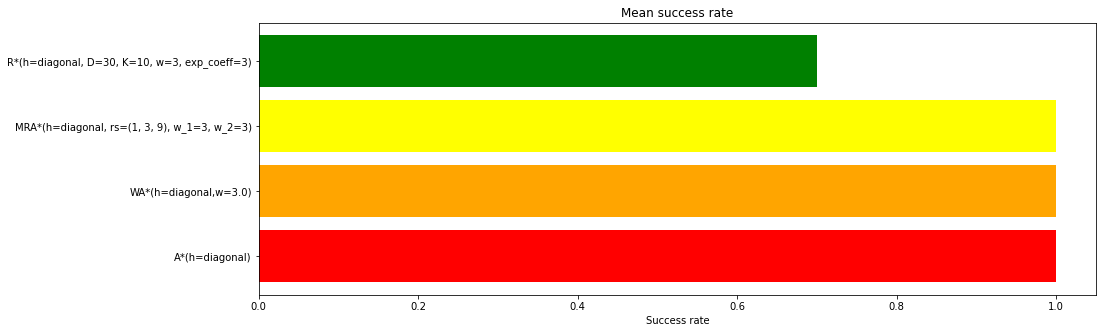

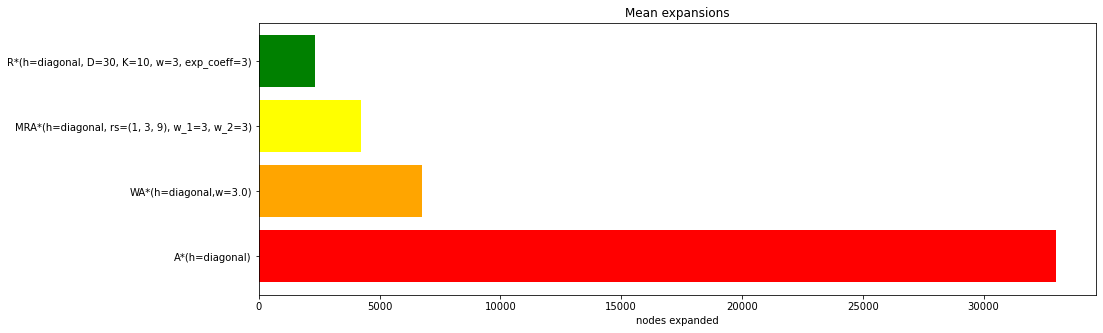

In [34]:
map = MaiMaps.MOSCOW
algorithms = [
    Astar(diagonal_dist),
    WAstar(diagonal_dist, 3),
    MRAstar(diagonal_dist, resolutions=(1, 3, 9), w_1=3, w_2=3),
    Rstar(diagonal_dist, D=30, K=10, w=3, exp_coeff=3)
]

MaiReader(map).read_map().draw(map)

p = Pipeline(
    reader=MaiReader(map, 10),
    algorithms=algorithms,
    processor=PlotSuccessRate().then(PlotMeanExpanded()),
    timelimit=10
)

p.run()

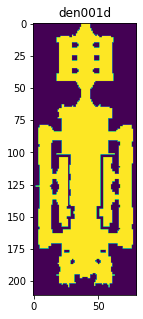

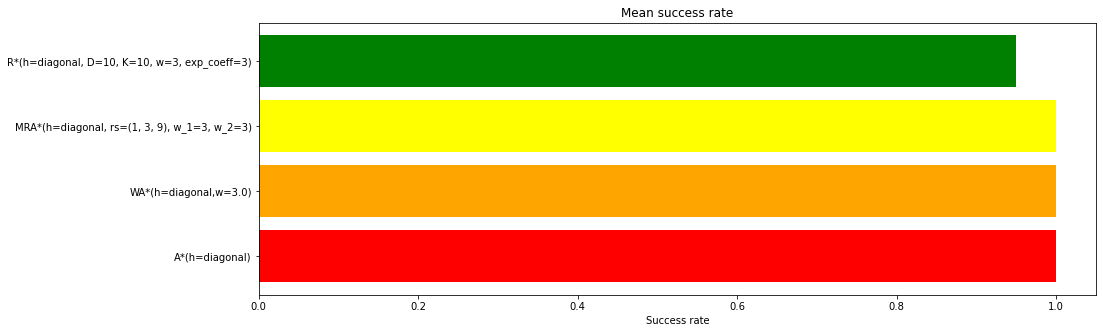

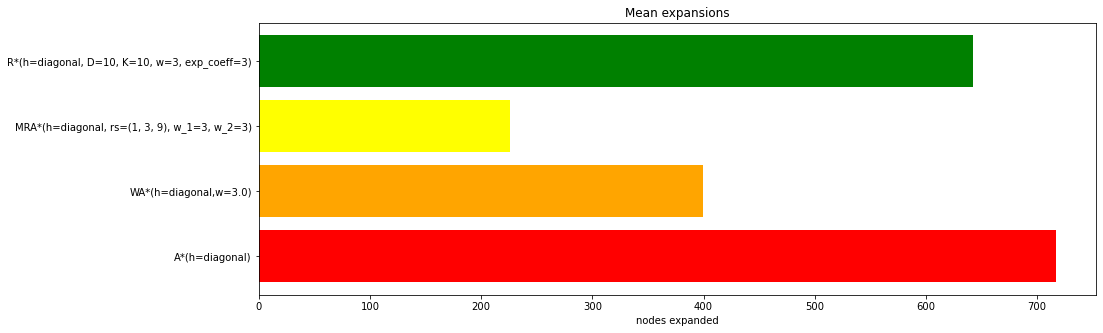

In [35]:
map = MaiMaps.DEN001D
algorithms = [
    Astar(diagonal_dist),
    WAstar(diagonal_dist, 3),
    MRAstar(diagonal_dist, resolutions=(1, 3, 9), w_1=3, w_2=3),
    Rstar(diagonal_dist, D=10, K=10, w=3, exp_coeff=3)
]

MaiReader(map).read_map().draw(map)

p = Pipeline(
    reader=MaiReader(map, 20),
    algorithms=algorithms,
    processor=PlotSuccessRate().then(PlotMeanExpanded()),
    timelimit=5
)

p.run()


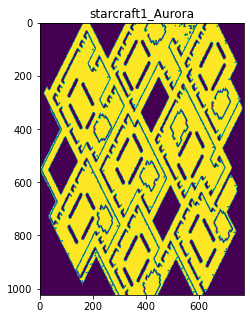

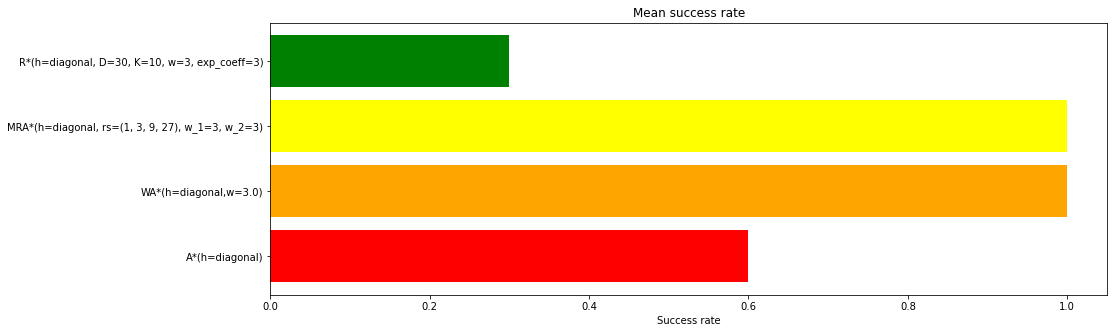

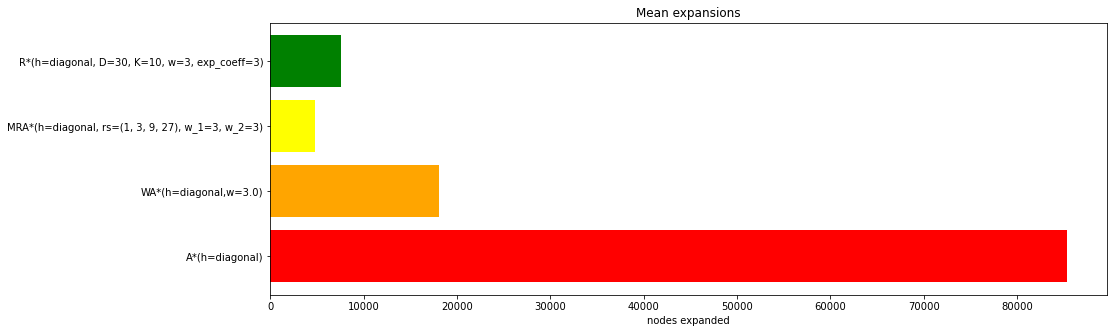

In [36]:
map = MaiMaps.STARCRAFT
algorithms = [
    Astar(diagonal_dist),
    WAstar(diagonal_dist, 3),
    MRAstar(diagonal_dist, resolutions=(1, 3, 9, 27), w_1=3, w_2=3),
    Rstar(diagonal_dist, D=30, K=10, w=3, exp_coeff=3)
]

MaiReader(map).read_map().draw(map)

p = Pipeline(
    reader=MaiReader(map, 10),
    algorithms=algorithms,
    processor=PlotSuccessRate().then(PlotMeanExpanded()),
    timelimit=10
)

p.run()

## Зависимость от гиперпараметров

### R*

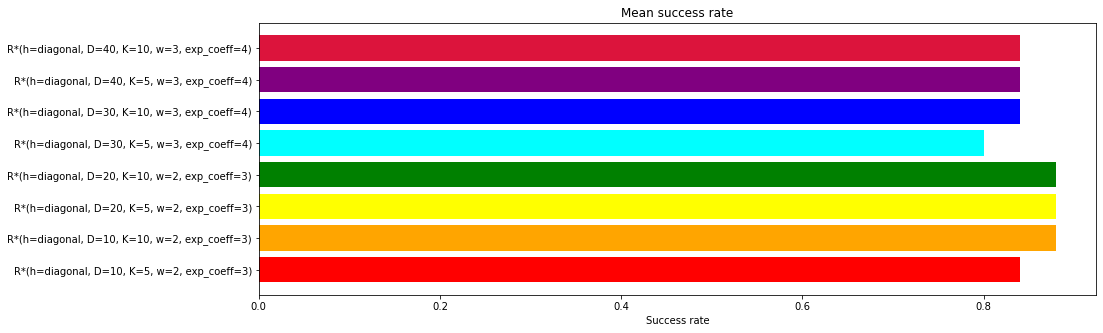

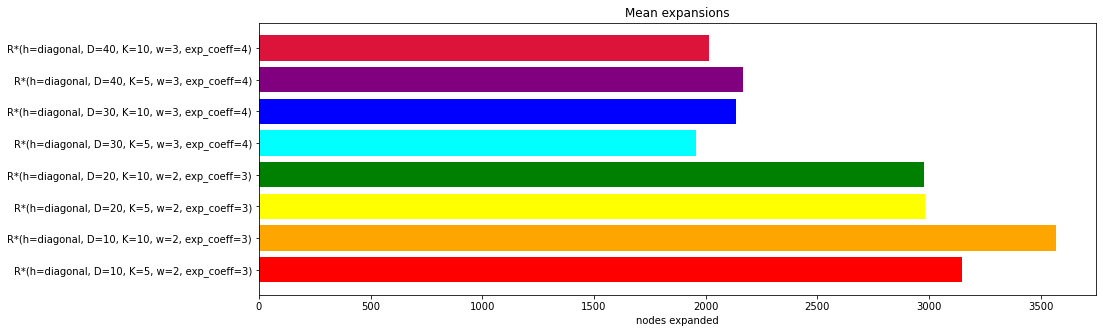

In [37]:
map = MaiMaps.MOSCOW
algorithms = [
    Rstar(diagonal_dist, D=10, K=5, w=2, exp_coeff=3),
    Rstar(diagonal_dist, D=10, K=10, w=2, exp_coeff=3),
    Rstar(diagonal_dist, D=20, K=5, w=2, exp_coeff=3),
    Rstar(diagonal_dist, D=20, K=10, w=2, exp_coeff=3),
    Rstar(diagonal_dist, D=30, K=5, w=3, exp_coeff=4),
    Rstar(diagonal_dist, D=30, K=10, w=3, exp_coeff=4),
    Rstar(diagonal_dist, D=40, K=5, w=3, exp_coeff=4),
    Rstar(diagonal_dist, D=40, K=10, w=3, exp_coeff=4),
]

p = Pipeline(
    reader=MaiReader(map, 25),
    algorithms=algorithms,
    processor=PlotSuccessRate().then(PlotMeanExpanded()),
    timelimit=8
)

p.run()

## MRA*

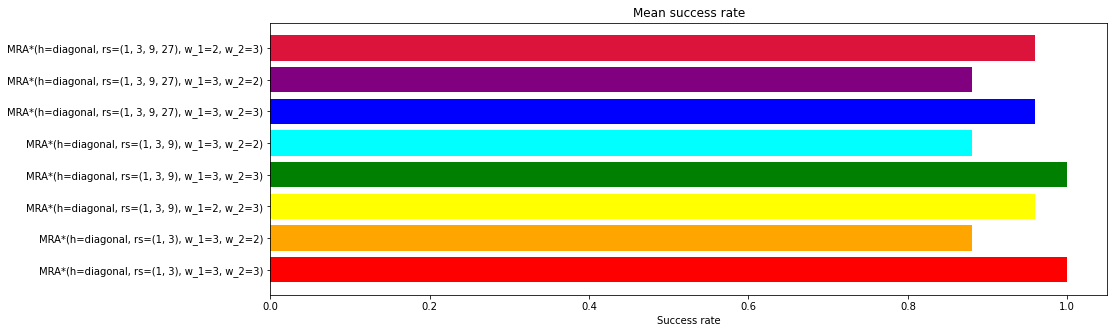

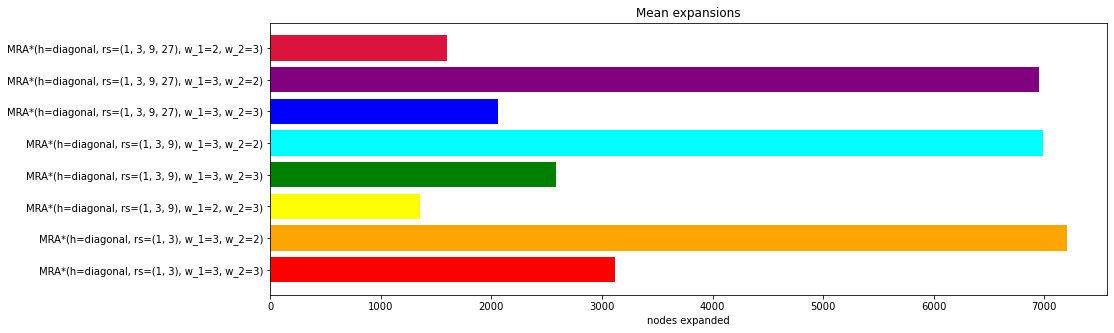

In [38]:

map = MaiMaps.MOSCOW
algorithms = [
    MRAstar(diagonal_dist, resolutions=(1, 3), w_1=3, w_2=3),
    MRAstar(diagonal_dist, resolutions=(1, 3), w_1=3, w_2=2),
    MRAstar(diagonal_dist, resolutions=(1, 3, 9), w_1=2, w_2=3),
    MRAstar(diagonal_dist, resolutions=(1, 3, 9), w_1=3, w_2=3),
    MRAstar(diagonal_dist, resolutions=(1, 3, 9), w_1=3, w_2=2),
    MRAstar(diagonal_dist, resolutions=(1, 3, 9, 27), w_1=3, w_2=3),
    MRAstar(diagonal_dist, resolutions=(1, 3, 9, 27), w_1=3, w_2=2),
    MRAstar(diagonal_dist, resolutions=(1, 3, 9, 27), w_1=2, w_2=3),
]

p = Pipeline(
    reader=MaiReader(map, 25),
    algorithms=algorithms,
    processor=PlotSuccessRate().then(PlotMeanExpanded()),
    timelimit=8
)

p.run()